# Language Analysis: Iran
Analyzing the language of **accounts and tweets** identified by Twitter to be associated with the country's information operations.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import langdetect
from collections import Counter
import iso639 as pylang

---
## Tweet Language Summary

In [2]:
filename_one = '../Data/iranian_tweets_csv_hashed.csv'
filename_two = '../Data/iran_201901_1_tweets_csv_hashed.csv'

#### Import dataset 1

In [3]:
iran_one = pd.read_csv(filename_one, dtype = {
    "tweetid": str,
    "userid": str,
    "user_display_name": str,
    "user_screen_name": str,
    "user_reported_location": str,
    "user_profile_description": str,
    "user_profile_url": str,
    "follower_count": str,
    "following_count": str,
    "account_creation_date": str,
    "account_language": str,
    "tweet_text": str,
    "tweet_time": str,
    "tweet_client_name": str,
    "in_reply_to_tweetid": str,
    "in_reply_to_userid": str,
    "quoted_tweet_tweetid": str,
    "is_retweet": bool,
    "retweet_userid": str,
    "retweet_tweetid": str,
    "latitude": str,
    "longitude": str,
    "quote_count": str,
    "reply_count": str,
    "like_count": str,
    "retweet_count": str,
    "hashtags": str,
    "urls": str,
    "user_mentions": str,
    "poll_choices": str,
})

#### Import dataset 2

In [4]:
iran_two = pd.read_csv(filename_two, dtype = {
    "tweetid": str,
    "userid": str,
    "user_display_name": str,
    "user_screen_name": str,
    "user_reported_location": str,
    "user_profile_description": str,
    "user_profile_url": str,
    "follower_count": str,
    "following_count": str,
    "account_creation_date": str,
    "account_language": str,
    "tweet_text": str,
    "tweet_time": str,
    "tweet_client_name": str,
    "in_reply_to_tweetid": str,
    "in_reply_to_userid": str,
    "quoted_tweet_tweetid": str,
    "is_retweet": bool,
    "retweet_userid": str,
    "retweet_tweetid": str,
    "latitude": str,
    "longitude": str,
    "quote_count": str,
    "reply_count": str,
    "like_count": str,
    "retweet_count": str,
    "hashtags": str,
    "urls": str,
    "user_mentions": str,
    "poll_choices": str,
})

#### Combine datasets

In [9]:
iran_datasets = [iran_one, iran_two]
iran = pd.concat(iran_datasets, sort=False)

#### Print number of tweets

In [10]:
print(len(iran))

5569992


#### Print features that we can access

In [11]:
iran.columns

Index(['tweetid', 'userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language', 'tweet_language',
       'tweet_text', 'tweet_time', 'tweet_client_name', 'in_reply_to_tweetid',
       'in_reply_to_userid', 'quoted_tweet_tweetid', 'is_retweet',
       'retweet_userid', 'retweet_tweetid', 'latitude', 'longitude',
       'quote_count', 'reply_count', 'like_count', 'retweet_count', 'hashtags',
       'urls', 'user_mentions', 'poll_choices'],
      dtype='object')

In [12]:
# Sample data of tweets / their detected language
for elem in iran.head(5)['tweet_text']:
    print(elem)
    print(langdetect.detect(elem))
    print()

@bellisarobz Ces photos illustrent parfaitement ce que ressentent les pères à un concert de One Direction http://t.co/YGdg8ihIh7
fr

@ParkerLampe An inquiry by congress confirms that ISIS is indeed a CIA creation http://t.co/eFRmFwYZTV
en

@hadeelhmaidi @wordpressdotcom CIA predict third terrorist attack after Sidney and Pakiistan in USA in 3 days http://t.co/IrPx7M223N
en

@MartinYannis l'avis bizarre de marcel tonton sur booba http://t.co/iFojzaCe4K
fr

@courrierinter Les laboratoires US de guerre biologique à l’origine de l’épidémie d’Ebola http://t.co/Kg1VuP4ixb
fr



In [50]:
# Detect language of tweets & store in a list
# Only do first 10,000 for Milestone 1
tweet_languages = []
for tweet_text in iran.head(10000)['tweet_text']:
    lang = langdetect.detect(elem)
    tweet_languages.append(lang)

In [51]:
# Get counts of each language
tweet_languages_count = Counter(tweet_languages)
print(tweet_languages_count)

Counter({'nl': 10000})


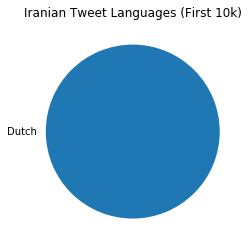

In [52]:
# Plot language counts
tweet_lang_types = []
tweet_lang_counts = []
for lang in tweet_languages_count:
    tweet_lang_types.append(lang)
    count = tweet_languages_count[lang]
    tweet_lang_counts.append(count)

tweet_lang_types_long = []
for lang in tweet_lang_types:
    lang_long = pylang.languages.get(alpha2 = lang).name
    tweet_lang_types_long.append(lang_long)
    
pyplot.pie(tweet_lang_counts, labels = tweet_lang_types_long)
pyplot.title('Iranian Tweet Languages (First 10k)')
pyplot.show()

## Account Language Summary

In [19]:
accounts_filename_one = '../Data/iranian_users_csv_hashed.csv'
accounts_filename_two = '../Data/iran_201901_1_users_csv_hashed.csv'

# Import datasets
iran_accounts_one = pd.read_csv(accounts_filename_one, dtype = {
    "userid": str,
    "user_display_name": str,
    "user_screen_name": str,
    "user_reported_location": str,
    "user_profile_description": str,
    "user_profile_url": str,
    "follower_count": str,
    "following_count": str,
    "account_creation_date": str,
    "account_language": str,
})
iran_accounts_two = pd.read_csv(accounts_filename_two, dtype = {
    "userid": str,
    "user_display_name": str,
    "user_screen_name": str,
    "user_reported_location": str,
    "user_profile_description": str,
    "user_profile_url": str,
    "follower_count": str,
    "following_count": str,
    "account_creation_date": str,
    "account_language": str,
})

In [20]:
# Combine datasets
iran_account_datasets = [iran_accounts_one, iran_accounts_two]
iran_users = pd.concat(iran_account_datasets, sort=False)
print(len(iran_users))

3081


In [21]:
iran_users.columns

Index(['userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language'],
      dtype='object')

In [22]:
# Sample data of account languages
for elem in iran_users.head(5)['account_language']:
    print(elem)

en
en
en-gb
en
en


In [37]:
# Get counts of each language
languages_count = Counter(iran_users['account_language'])
print(languages_count)

Counter({'en': 2773, 'ar': 118, 'fa': 80, 'id': 52, 'en-gb': 30, 'es': 11, 'tr': 11, 'fr': 3, 'ru': 1, 'el': 1, 'de': 1})


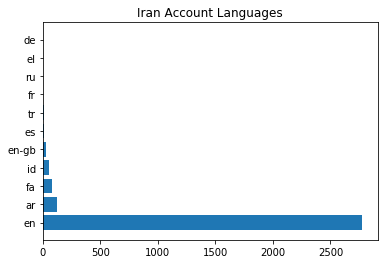

In [45]:
# Plot language counts
lang_types = []
lang_counts = []
sorted_languages_count = languages_count.most_common()
for lang, count in sorted_languages_count:
    lang_types.append(lang)
    lang_counts.append(count)

# lang_types_long = []
# for lang in lang_types:
#     lang_long = pylang.languages.get(alpha2 = lang).name
#     lang_types_long.append(lang_long)

pyplot.title('Iran Account Languages')
# y_pos = np.arange(len(lang_types_long))
y_pos = np.arange(len(lang_types))
pyplot.barh(y_pos, lang_counts)
# pyplot.yticks(y_pos, lang_types_long)
pyplot.yticks(y_pos, lang_types)
pyplot.show()